# Milestone 2
This notebook summerizes all of what we have done in the project so far, and below is the research questions we wish to answer in this project.

1. How has the crops/livestock primary production developed since 1960?
2. Is there a connection between the development of livestock primary production and crop production?
3. How are the differences in production quantities between the different continents?
4. How has the development in agriculture affected emission of greenhouse gasses?

To answer this we are using 4 different datasets, but all are collected from FAO-STAT (Food and Agriculture Organization of the United Nations - <http://www.fao.org/faostat/en/#data>). In this notebook we will describe and clean all of the data. 
Note that this is a summary, and we have an own notebook for each of the datasets where the cleaning is in more detail. This notebook should however be enough to understand what we have done. 

**Note regarding our datasets from FAO:**  
- _There is limited geographical comparability due to differences between countries in methods and coverage, except for regions where countries are bound by regulations mandating harmonized methods, such as EU countries._
- _For shorter time periods, reasonably good comparability over time can be expected, as there is stability in the product definition and classification. However, as the time series are very long (from 1961) full comparability over time cannot be expected._

http://www.fao.org/faostat/en/#data/QL/metadata


### Genereal Layout of Datasets
As we have collected all the datasets from the same source they are somewhat organized in the same way. There are 7 columns with metadata and and most of the values there is also a flag to explain how the data is collected.


| Column name         | Explanation|
|------------------------|--------|
| Area                   |Name of country/area|
| Area Code              |Unique code for each country/area|
| Item                   |Type of product, e.g "Eggs, hen, in shell"|
| Item Code              |Unique code for each Item|
| Element                |Type data, e.g. Production, Yield, Milk Animals |
| Unit                   |The unit of the measurement of the element, in total 9 different units |
| Element Code           |Unique code based on pairs of Element and Unit|



|  Flag  | Meaning of flag        |
|--------|------------------------|
| *      | Unofficial data        |
| F      | FAO Estimate           |
| NaN    | Official data          |
| Fc     | Calculated data        |
| A      | Aggregate, may include official, semi-official, estimated or calculated data |
| M      | Data not available     | 
| Im     |FAO data based on imputation methodology |

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

***
## Livestock

The livestock dataset covers information on several livestock products globally, during the time 1961-2014. From 2014-2017 several values may be missing. The data contains all the production from both industrial production and farm production. The dataset is available at http://www.fao.org/faostat/en/#data/QL.   

Each row of the raw livestock dataset contains data on all years available, on a given metadata. There are 7 columns of metadata, which can be seen below, and the rest of the columns are data for each year. The years usually span from 1961 to 2017, but some years are missing.

The Item also describes if a product is “Indigenous” or not. If a product is not “indigenous” the animal from which the product has been derived has been imported.


In [125]:
livestock = pd.read_csv('raw_data/Production_LivestockPrimary_E_All_Data.csv', sep = ',', encoding = 'latin-1')
livestock.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,1062,"Eggs, hen, in shell",5313,Laying,1000 Head,4000.0,F,4400.0,...,9500.0,F,9500.0,F,9337.0,Im,9369.0,Im,10688.0,F
1,2,Afghanistan,1062,"Eggs, hen, in shell",5410,Yield,100mg/An,25000.0,Fc,25000.0,...,18947.0,Fc,19474.0,Fc,21253.0,Fc,21263.0,Fc,18713.0,Fc


### Exploration

Thorough information on all columns can be found in the notebook *livestock_data_cleaning.ipynb*.   
Here is the different elements that are found in the dataset.


|  Element             | Description            |
|----------------------|------------------------|
| Laying               | Birds raised for laying eggs        |
| Yield                | How much of the animal which is used           |
| Production           | How much is produced          |
| Producing Animals/Slaughtered    | How many animals that are being produced for meat        |
| Yield/Carcass Weight | Same as yield, but also taking account size of animal |
| Milk Animals         | How many animals used for milk production     | 
| Prod Popultn         | Population of a given item  |


### Data Cleaning

**Elements**  
As we are primarily interested in meat production in this task, we take away all elements except _Production_ and _Producing Animals/Slaughtered_. 

In [126]:
livestock_prod = livestock[(livestock['Element'] == 'Production') | (livestock['Element'] == 'Producing Animals /Slaughtered') ]

**Items**  
After removing the other elements, we remove all items that are not meat.

In [127]:
livestock_meat = livestock_prod[livestock_prod['Item'].str.contains('Meat')]
livestock_meat.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
8,2,Afghanistan,1137,"Meat indigenous, camel",5322,Production,Head,20000.0,F,22393.0,...,19500.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,2,Afghanistan,1137,"Meat indigenous, camel",5510,Production,tonnes,3600.0,Fc,4031.0,...,3510.0,Fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Units**  
To easily compare the data, we would like to have a joint unit for all the data. We see that for each item we get two numbers, number of animals (Heads) and the weight of produced meat (tonnes). We choose to only look at produced meat, and remove the head-counts.

In [128]:
livestock_meat = livestock_meat[livestock_meat['Unit'].str.contains('tonnes')]
livestock_meat.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
10,2,Afghanistan,1137,"Meat indigenous, camel",5510,Production,tonnes,3600.0,Fc,4031.0,...,3510.0,Fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,2,Afghanistan,944,"Meat indigenous, cattle",5510,Production,tonnes,42984.0,Fc,45811.0,...,117829.0,Fc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Flags**  
The flags say something about the reliability of the data, but as this is the best data available we "trust" all the data. However, we do keep the flags in case we observe inconsistencies in the future.

**Reshaping**  
To have this dataset fit the same format as the others we have to reshape it, so that the yearly values are rows instead of columns. Afterwards we clean years to an int (remove Y before the year).

In [129]:
# Find the columns which are years, flags and metadata
col_years = [col for col in livestock_meat.columns if (col[0] == 'Y') and (col[-1] != 'F') ]
col_flags = [col for col in livestock_meat.columns if (col[0] == 'Y') and (col[-1] == 'F') ]
col_metadata = livestock_meat.columns[0:7]

# Do two melts, once on year and once on flag and add flags to dataframe with years
temp_years = livestock_meat.melt(id_vars = col_metadata, value_vars = col_years, var_name = 'Year', value_name = 'Value')
temp_flags = livestock_meat.melt(id_vars = col_metadata, value_vars = col_flags, var_name = 'FlagYear', value_name = 'Flag')
meat_data = temp_years.join(temp_flags['Flag'])

In [130]:
# Remove Y n
meat_data['Year'] = meat_data['Year'].str.replace('Y', '').astype(int)

In [131]:
meat_data.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Year,Value,Flag
0,2,Afghanistan,1137,"Meat indigenous, camel",5510,Production,tonnes,1961,3600.0,Fc
1,2,Afghanistan,944,"Meat indigenous, cattle",5510,Production,tonnes,1961,42984.0,Fc


**Missing Data**  
Below we can see that there are some data missing in the dataset, and when we are talking are talking about production at country-levet this is not very suprising. Since 1960, a lot of states have been founded and dissolved, with the Sovjet Union in 1991 as the most notable. As we are mostly looking at a continent-level, we choose to not clean this up at the moment, although it is important to remember with the data.  
However, we choose to remove the data after 2013 as a lot of information is missing here.

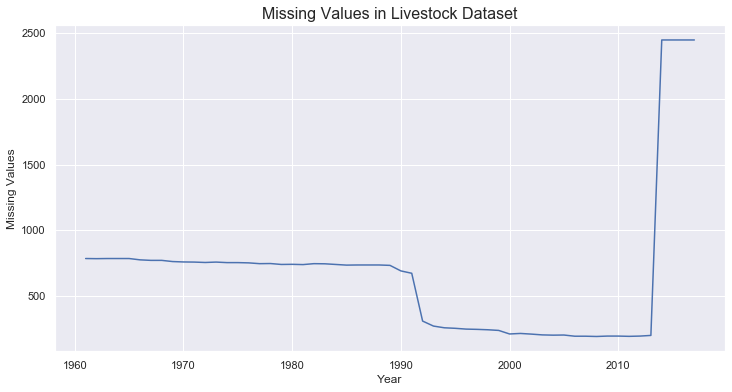

In [132]:
# Create series with missing values
missing_values = meat_data['Value'].isnull().groupby(meat_data['Year']).sum()

# Plot missing values with years on x-axis and missing values on y-axis
f = plt.figure(figsize = (12,6))
plt.plot(missing_values.index, missing_values.values)
plt.title('Missing Values in Livestock Dataset', fontsize = 16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Missing Values', fontsize=12)
plt.show()

In [133]:
drop_years = ['Y2014', 'Y2015', 'Y2016', 'Y2017',  'Y2014F', 'Y2015F', 'Y2016F', 'Y2017F' ]
livestock_meat.drop(drop_years, axis = 1, inplace = True)
livestock_meat.head(2)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2009,Y2009F,Y2010,Y2010F,Y2011,Y2011F,Y2012,Y2012F,Y2013,Y2013F
10,2,Afghanistan,1137,"Meat indigenous, camel",5510,Production,tonnes,3600.0,Fc,4031.0,...,3960.0,Fc,3960.0,Fc,3564.0,Fc,3600.0,Fc,3510.0,Fc
13,2,Afghanistan,944,"Meat indigenous, cattle",5510,Production,tonnes,42984.0,Fc,45811.0,...,134133.0,Fc,130922.0,Fc,138002.0,Fc,137723.0,Fc,117829.0,Fc


**Categorizing the Data**  
We would like to divide our dataset into areas, countries and continents for easier use in the future. Luckily, because of the way area codes are organized, this is easily done. Everything under 251 is countries, and everything above 5000 are areas. 

In [134]:
from scripts.helpers import *
print(split_fao_data.__doc__)

meat_countries, meat_area, meat_continents = split_fao_data(meat_data)


    Function that splits data into countries, areas and continents.
    params:
        df: fao-dataframe that includes area codes.
        
    returns:
        countries: dataframe with area-code < 500
        area: dataframe with only area-code > 500
        continents: dataframe with the 6 continents
    
    


#### Summary of Livestock
After the data cleaning we have three dataframes, one for countries, one for area and one with only continents. 
We have kept the cleaning quite general in order to not miss important information, but have still ended up with a dataset that is easy to use.

***
## Crops

The dataset covers production of all primary crops for all countries and regions in the world and the production is only for human consumption. Household production is not included in the data, that is, crops that are planted for personal consumption, in for example one’s garden. The dataset is available at <http://www.fao.org/faostat/en/#data/QC>.  

Each row of the crops dataset contains data for a certain country/area, crop item and year. There are 8 columns of metadata, which can be seen below. The years in the dataset span from 1961 to 2007.


In [136]:
data = pd.read_csv('raw_data/fao_data_crops_data.csv.zip', compression='zip', header=0, sep=',', quotechar='"')
data.head(3)

,country_or_area,element_code,element,year,unit,value,value_footnotes,category
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes
2,Americas +,31,Area Harvested,2005.0,Ha,49404.0,A,agave_fibres_nes


### Explanation of Columns


#### Elements
- **Area harvested** refer to the area under cultivation. Area under cultivation means the area that corresponds to the total sown area, but after the harvest it excludes ruined areas (e.g. due to natural disasters). If the same land parcel is used twice in the same year, the area of this parcel can be counted twice. 
- **Production quantity** means the harvested production. Harvested production means production including on-holding losses and wastage, quantities consumed directly on the farm and marketed quantities, indicated in units of basic product weight. *Harvest year* means the calendar year in which the harvest begins. 
- **Yield** means the harvested production per ha for the area under cultivation. 
- **Seed** quantity comprises all amounts of the commodity in question used during the reference period for reproductive purposes, such as seed or seedlings. Usually, the average seed rate in any given country does not vary greatly from year to year.

#### Categories
Crop statistics are recorded for 172 products, covering the following categories: Crops Primary, Fibre Crops Primary, Cereals, Coarse Grain, Citrus Fruit, Fruit, Jute Jute-like Fibres, Oilcakes Equivalent, Oil crops Primary, Pulses, Roots and Tubers, Treenuts and Vegetables and Melons. The objective is to comprehensively cover production of all primary crops for all countries and regions in the world. 



### Data Cleaning

#### Renaming
First of all we rename the columns to fit the livestock dataset.  
This is mainly to make the first letter capital, but _Footnote_ changes to _Flag_ and _Category_ changes to _Item_.

In [137]:
new_names = {'country_or_area': 'Area', 'element_code': 'Element Code', 
             'element': 'Element', 'year': 'Year', 'unit': 'Unit', 
             'value': 'Value', 'value_footnotes': 'Flag', 'category': 'Item'}

data.rename(columns = new_names, inplace = True)
data.head(2)

,Area,Element Code,Element,Year,Unit,Value,Flag,Item
0,Americas +,31,Area Harvested,2007.0,Ha,49404.0,A,agave_fibres_nes
1,Americas +,31,Area Harvested,2006.0,Ha,49404.0,A,agave_fibres_nes


#### Unnecessary rows:
The dataset is ordered according to the alphabetical order of the categories and after the end of each Item, there are rows that contain the footnote-descriptions above. We therefore need to remove these rows since they don't contain any useful data.

In [138]:
# Removing rows that do not contain useful information
keep_col = np.logical_not(data.Area.isin(['fnSeqID', 'Fc', 'A ', 'NR', 'F ', '* ']))
crops_data = data[keep_col]

In [139]:
print("Number of countries in our dataset:", crops_data.Area.unique().shape[0])

Number of countries in our dataset: 253


#### Keep only category totals

Since we want to analyse the general production of crops it is more interesting for us to look at the total production of the different categories instead of looking at every type of item. We will therefore only keep the totals in our dataset. The categories are stored using the following item names:
- Fibre Crops Primary = fibre_crops_primary 
- Cereals = cereals_total
- Coarse Grain = coarse_grain_total
- Citrus Fruit = citrus_fruit_total
- Fruit = fruit_excl_melons_total
- Jute Jute-like Fibres = jute_jute_like_fibres
- Oilcakes Equivalent = oilcakes_equivalent
- Oil crops Primary = oil_crops_primary
- Pulses = pulses_total
- Roots and Tubers = roots_and_tubers_total 
- Treenuts = treenuts_total 
- Vegetables and Melons = vegetables_melons_total

In [140]:
keywords = ['_total', 'primary', 'jute_jute', 'oilcakes']
items = crops_data.Item
crops_categorized = crops_data[items.str.contains('|'.join(keywords))]

print("Number of countries in categorized dataset", crops_categorized.Area.unique().shape[0])
print("\nItem categories in categorized dataset:\n", crops_categorized.Item.unique())

Number of countries in categorized dataset 253

Item categories in categorized dataset:
 ['cereals_total' 'citrus_fruit_total' 'coarse_grain_total'
 'fibre_crops_primary' 'fruit_excl_melons_total' 'jute_jute_like_fibres'
 'oilcakes_equivalent' 'oilcrops_primary' 'pulses_total'
 'roots_and_tubers_total' 'treenuts_total' 'vegetables_melons_total']


#### Missing information?

Are we now missing any information in our datasets?

In [141]:
print("Missing information in categorized dataset: \n", crops_categorized.isna().sum())

Missing information in categorized dataset: 
 Area            0
Element Code    0
Element         0
Year            0
Unit            0
Value           0
Flag            0
Item            0
dtype: int64


No information is missing as far as we can tell. No cells seem to be missing information.

#### Elements

**Observation:** Are the elements apart form Production Quantity really necessary?

- *Seed* is the amount of seeds that were planted, which is not relevant for the scope of this project.
- *Area Harvested* is the amount of land that was used for planting the crops in our dataset, which is not relevant for the scope of this project.
- *Yield* is the amount of crops that was given by the planted area, which is not relevant for the scope of this project.

We will therefore remove element categories: Seed, Area Harvested and Yield.

In [142]:
elements = ['Seed', 'Area Harvested', 'Yield']
crops_processed = crops_categorized[np.logical_not(crops_categorized['Element'].isin(elements))]
crops_processed.head(3)

,Area,Element Code,Element,Year,Unit,Value,Flag,Item
364540,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,896908.0,A,cereals_total
364541,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,718798.0,A,cereals_total
364542,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,841895.0,A,cereals_total


But what do the element categories with element codes > 140 include? Can we remove these?

#### Element codes > 140

In [143]:
elem_codes = ['152', '154', '434', '438', '432', '436']
study_data = crops_processed[crops_processed['Element Code'].isin(elem_codes)]
print("Number of countries in this data: ", study_data.Area.unique().shape[0])
study_data.head(5)

Number of countries in this data:  222


,Area,Element Code,Element,Year,Unit,Value,Flag,Item
364540,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2007.0,1000 Int. $,896908.0,A,cereals_total
364541,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2006.0,1000 Int. $,718798.0,A,cereals_total
364542,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2005.0,1000 Int. $,841895.0,A,cereals_total
364543,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2004.0,1000 Int. $,549037.0,A,cereals_total
364544,Afghanistan,152,Gross Production 1999-2001 (1000 I$),2003.0,1000 Int. $,685931.0,A,cereals_total


From what we can see in the new dataset that only contain these elements, both the rows in the beginning and end have the Item cereals_total. Is this the only Item?

In [144]:
study_data.Item.unique()

array(['cereals_total'], dtype=object)

Apparently so. Does this catgory exist for the other type of elements as well? Because if it does, we should be able to remove the elements with codes 152-438 from our dataset.

In [145]:
study_data_2 = crops_processed[crops_processed.Item.str.contains('cereals_total')]
study_data_2 = study_data_2[np.logical_not(study_data_2['Element Code'].isin(elem_codes))]
print("Number of countries in this data: ", study_data_2.Area.unique().shape[0])
study_data_2['Element Code'].unique()

Number of countries in this data:  225


array(['51'], dtype=object)

We can now see that the data for the Item 'cereals_total' with element codes > 140 are subgroups of element codes < 140. We can therefore remove this data from our dataset.

In [146]:
# Drop rows with element codes > 140
drop_col = np.logical_not(crops_processed['Element Code'].isin(elem_codes))
crops_cleaned = crops_processed[drop_col]
crops_cleaned.head(3)

,Area,Element Code,Element,Year,Unit,Value,Flag,Item
364916,Afghanistan,51,Production Quantity,2007.0,tonnes,5778000.0,A,cereals_total
364917,Afghanistan,51,Production Quantity,2006.0,tonnes,4638000.0,A,cereals_total
364918,Afghanistan,51,Production Quantity,2005.0,tonnes,5425000.0,A,cereals_total


#### Area names with '+'

There are countries/areas that contain a '+' at the end of the name. What names contain this sign and what do they have in common?

In [147]:
# Examining what names contain '?'
country_series = crops_cleaned.Area
names_with_sign = country_series[country_series.str.endswith('+')]
names_with_sign.unique()

array(['Africa +', 'Americas +', 'Asia +', 'Australia and New Zealand +',
       'Caribbean +', 'Central America +', 'Central Asia +',
       'Eastern Africa +', 'Eastern Asia +', 'Eastern Europe +',
       'Europe +', 'European Union +',
       'LandLocked developing countries +', 'Least Developed Countries +',
       'Low Income Food Deficit Countries +', 'Melanesia +',
       'Micronesia +', 'Middle Africa +',
       'Net Food Importing Developing Countries +', 'Northern Africa +',
       'Northern America +', 'Northern Europe +', 'Oceania +',
       'Small Island Developing States +', 'South America +',
       'South-Eastern Asia +', 'Southern Africa +', 'Southern Asia +',
       'Southern Europe +', 'Western Africa +', 'Western Asia +',
       'Western Europe +', 'World +', 'Polynesia +'], dtype=object)

All of the country/area names that contain a '+' at the end are all areas. We can therefore divide the dataset into several groups: one with all countries, one with all continents and one with the remaining areas.

#### Categorizing the Data 

In [114]:
# Splitting crops_data into country, continent and area based sets and renaming Area column

crops_country = crops_cleaned[np.logical_not(country_series.str.endswith('+'))].rename({'Area': 'Area'}, axis=1)
crops_remain = crops_cleaned[country_series.str.endswith('+')]

# Remove last two characters from continent/area name
crops_remain.Area = crops_remain.Area.str[:-2]

continents = ['Africa', 'Northern America', 'South America', 'Asia', 'Oceania', 'Europe']
is_continent = crops_remain.Area.isin(continents)

crops_continent = crops_remain[is_continent].rename({'Area': 'Area'}, axis=1)
crops_area = crops_remain[np.logical_not(is_continent)].rename({'Area': 'Area'}, axis=1)

print('Number of unique countries:', crops_country.Area.unique().shape[0])
print('Number of unique continents:', crops_continent.Area.unique().shape[0])
print('Number of unique areas:', crops_area.Area.unique().shape[0])

Number of unique countries: 219
Number of unique continents: 6
Number of unique areas: 28
